In [1]:
# 영화댓글 긍정/부정 찾기

import numpy as np
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import chardet # chardet.detect : 자기가 알아서 인코딩을 해줌
# .encoding 자동으로 감지해주는 library
# 
with open("imdb_master.csv",'rb') as f: # 안에 내장되어 있는 컴퓨터 언어들을77 모두 읽음
    result = chardet.detect(f.read())
    
train = pd.read_csv('imdb_master.csv',encoding = result['encoding'])
train.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [83]:
train.shape

(100000, 5)

In [5]:
# 필요없는 열 제거

train.drop(train.columns[[0,1,4]],axis = 1) # axis = 1 열기준, 가로방향

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
...,...,...
99995,"Delightfully awful! Made by David Giancola, a ...",unsup
99996,"Watching Time Chasers, it obvious that it was ...",unsup
99997,At the beginning we can see members of Troma t...,unsup
99998,"The movie was incredible, ever since I saw it ...",unsup


In [107]:
train_ = train.drop(train.columns[[0,1,4]],axis = 1)
train_

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
...,...,...
99995,"Delightfully awful! Made by David Giancola, a ...",unsup
99996,"Watching Time Chasers, it obvious that it was ...",unsup
99997,At the beginning we can see members of Troma t...,unsup
99998,"The movie was incredible, ever since I saw it ...",unsup


In [108]:
train_.label.unique()

array(['neg', 'pos', 'unsup'], dtype=object)

In [111]:
# neg = 0, pos = 1 변환 (정수 인코딩 변환)

d = train_[train_['label'] != 'unsup']
train['label'].value_counts()
#train_.label = [(i!='neg')*1  for i in train_.label]

unsup    50000
neg      25000
pos      25000
Name: label, dtype: int64

In [120]:
d.label = [(i!='neg')*1  for i in d.label]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [140]:
d

,user_review,positive
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
...,...,...
49995,"Seeing as the vote average was pretty low, and...",1
49996,"The plot had some wretched, unbelievable twist...",1
49997,I am amazed at how this movie(and most others ...,1
49998,A Christmas Together actually came before my t...,1


In [122]:
# 컬럼명 재 셋팅

#d = train_
print(d.columns)
d.columns = ['user_review','positive']
print(d.head())

Index(['review', 'label'], dtype='object')
                                         user_review  positive
0  Once again Mr. Costner has dragged out a movie...         0
1  This is an example of why the majority of acti...         0
2  First of all I hate those moronic rappers, who...         0
3  Not even the Beatles could write songs everyon...         0
4  Brass pictures (movies is not a fitting word f...         0


In [123]:
# 훈련용 셋, 테스트 셋 분리 (7:3 분리)

split = 0.7
#d_train=d[int(split*len(d)):]  # train data set
#d_test=d[:int((split)*len(d))] # test data set

In [168]:
#d_train=d[int(split*len(d)):]  # train data set
#d_test=d[:int((split)*len(d))] # test data set
d_train = d.sample(n= int(split*len(d)))
d_test = d.drop(d_train.index)

In [169]:
print(d[:int(split*len(d))])
print(d[int((split)*len(d)):])

                                             user_review  positive
0      Once again Mr. Costner has dragged out a movie...         0
1      This is an example of why the majority of acti...         0
2      First of all I hate those moronic rappers, who...         0
3      Not even the Beatles could write songs everyon...         0
4      Brass pictures (movies is not a fitting word f...         0
...                                                  ...       ...
34995  Just the fact that the cover is a drawing, lik...         0
34996  This movie was pretty bad. Sci-fi is usually m...         0
34997  This movie should have NEVER been made. From t...         0
34998  This movie appears to have been made by someon...         0
34999  This movie was the worst movie ever made on th...         0

[35000 rows x 2 columns]
                                             user_review  positive
35000  First, the CGI in this movie was horrible. I w...         0
35001  The film is about a sabretoot

In [170]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # 함수의 변수화
features = vectorizer.fit_transform(d_train.user_review)
features
# training data가 7만건, feature가 12만건

<35000x88837 sparse matrix of type '<class 'numpy.int64'>'
	with 4782323 stored elements in Compressed Sparse Row format>

In [171]:
len(vectorizer.get_feature_names()), vectorizer.get_feature_names()

(88837,
 ['00',
  '000',
  '00000000000',
  '0000000000001',
  '00001',
  '000dm',
  '001',
  '006',
  '0069',
  '007',
  '0079',
  '007s',
  '0080',
  '0083',
  '009',
  '0093638',
  '00am',
  '00pm',
  '00s',
  '00schneider',
  '01',
  '0126',
  '01pm',
  '02',
  '020410',
  '0230',
  '029',
  '03',
  '039',
  '04',
  '041',
  '044',
  '05',
  '050',
  '05nomactr',
  '06',
  '0615',
  '06th',
  '07',
  '07b',
  '08',
  '087',
  '089',
  '08th',
  '09',
  '0and',
  '0f',
  '0s',
  '0tt',
  '10',
  '100',
  '1000',
  '10000',
  '1000000',
  '10000000000000',
  '10000th',
  '1000s',
  '1001',
  '1004',
  '100b',
  '100bt',
  '100ft',
  '100ibs',
  '100k',
  '100m',
  '100min',
  '100mins',
  '100mph',
  '100s',
  '100th',
  '100times',
  '100x',
  '100yards',
  '100â',
  '101',
  '101st',
  '102',
  '102nd',
  '103',
  '104',
  '1040',
  '1040a',
  '105',
  '1050',
  '105lbs',
  '106',
  '106min',
  '107',
  '108',
  '1080p',
  '109',
  '10am',
  '10ft',
  '10ish',
  '10k',
  '10lines',

In [172]:
# 3만건에서 100번째 칸까지 확인하기

i = 30000
j = 100

words=vectorizer.get_feature_names()[i:i+30]
pd.DataFrame(features[j:j+10,i:i+30].todense(), columns = words)

,foods,foodstuffs,foodâ,fooey,fool,foole,fooled,fooledtons,fooler,foolhardiness,...,foot,footage,footages,footageâ,football,footballer,footballers,foote,footed,footer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
words

['foods',
 'foodstuffs',
 'foodâ',
 'fooey',
 'fool',
 'foole',
 'fooled',
 'fooledtons',
 'fooler',
 'foolhardiness',
 'foolhardy',
 'foolight',
 'fooling',
 'foolish',
 'foolishly',
 'foolishness',
 'foolproof',
 'fools',
 'foom',
 'foose',
 'foot',
 'footage',
 'footages',
 'footageâ',
 'football',
 'footballer',
 'footballers',
 'foote',
 'footed',
 'footer']

modeling

In [174]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(features, d_train.positive) # 학습
# features : countervectorizer 값 (frequency 값)

MultinomialNB()

In [181]:
pred1 = model1.predict_proba(vectorizer.transform(d_test.user_review)) # 예측한 feature값 출력
print(pred1)
print(pred1.round(2))

[[9.99974363e-01 2.56373327e-05]
 [1.00000000e+00 2.06188251e-13]
 [9.99849707e-01 1.50292725e-04]
 ...
 [7.06801877e-02 9.29319812e-01]
 [2.92602191e-03 9.97073978e-01]
 [4.43823419e-03 9.95561766e-01]]
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.07 0.93]
 [0.   1.  ]
 [0.   1.  ]]


In [176]:
# 결과해석
# neg = 0, pos = 1 (두개 합치면 1)

In [177]:
pred1.shape

(15000, 2)

In [178]:
# 평가하기

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

In [182]:
def performance(y_true,pred, color = 'blue',ann=True):
    acc = accuracy_score(y_true,pred[:,1] > 0.5) # 긍정일 확률 확인(0.5보다 큰지 확인)
    auc = roc_auc_score(y_true,pred[:,1])
    fpr, tpr,thr = roc_curve(y_true,pred[:,1])
    plot(fpr,tpr,color, linewidth = '3')
    xlabel('False Positive Rate')
    ylabel('True Positive Rate')
    if ann:
        annotate('Acc: %0.2f'% acc,(0.1,0.8),size = 14)
        annotate('Auc: %0.2f'% auc,(0.1,0.7),size = 14)

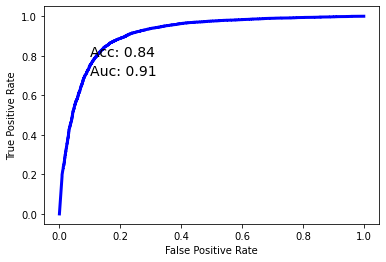

In [183]:
performance(d_test.positive,pred1)